In [ ]:
dfrom google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd

# Update the paths to point to your Google Drive location
image_folder ='/content/drive/MyDrive/Colab Notebooks/spring/train/radiology/images'
captions_file ='/content/drive/MyDrive/captions.txt'

# Load the captions file
df = pd.read_table(captions_file)


Mounted at /content/drive


In [ ]:
import os
from PIL import Image

# Path to the folder containing images
image_folder = '/content/drive/MyDrive/Colab Notebooks/spring/train/radiology/images' # Update with actual path to images folder

# Initialize lists for image paths and captions
image_paths = []
captions = []

# Loop through each image file and use the filename as the caption
for filename in os.listdir(image_folder):
    if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check for image file extensions
        image_path = os.path.join(image_folder, filename)
        caption = os.path.splitext(filename)[0]  # Use filename without extension as caption
        image_paths.append(image_path)
        captions.append(caption)

# Create a DataFrame with image paths and captions
image_df = pd.DataFrame({
    'image_path': image_paths,
    'caption': captions
})

print(image_df.head())


                                          image_path  \
0  /content/drive/MyDrive/Colab Notebooks/spring/...   
1  /content/drive/MyDrive/Colab Notebooks/spring/...   
2  /content/drive/MyDrive/Colab Notebooks/spring/...   
3  /content/drive/MyDrive/Colab Notebooks/spring/...   
4  /content/drive/MyDrive/Colab Notebooks/spring/...   

                            caption  
0      PMC3305464_1477-7819-10-33-1  
1      PMC3305609_1532-429X-14-7-15  
2     PMC3306114_jovr_v06_no4_09f10  
3  PMC3305187_1532-429X-14-S1-O87-1  
4          PMC3307234_SNI-3-17-g007  


In [ ]:
import numpy as np

# Dummy label assignment (or replace with actual label data if available)
image_df['label'] = 'class1'  # Use real labels if available

# Randomly assign train/test/valid split
np.random.seed(0)  # For reproducibility
image_df['split'] = np.random.choice(['train', 'test', 'valid'], size=len(image_df), p=[0.7, 0.2, 0.1])

print(image_df.head())


                                          image_path  \
0  /content/drive/MyDrive/Colab Notebooks/spring/...   
1  /content/drive/MyDrive/Colab Notebooks/spring/...   
2  /content/drive/MyDrive/Colab Notebooks/spring/...   
3  /content/drive/MyDrive/Colab Notebooks/spring/...   
4  /content/drive/MyDrive/Colab Notebooks/spring/...   

                            caption   label  split  
0      PMC3305464_1477-7819-10-33-1  class1  train  
1      PMC3305609_1532-429X-14-7-15  class1   test  
2     PMC3306114_jovr_v06_no4_09f10  class1  train  
3  PMC3305187_1532-429X-14-S1-O87-1  class1  train  
4          PMC3307234_SNI-3-17-g007  class1  train  


In [ ]:
# Count the number of entries in each split
split_counts = image_df['split'].value_counts()

print("Number of samples in each split:")
print(split_counts)



Number of samples in each split:
split
train    10512
test      2921
valid     1471
Name: count, dtype: int64


In [ ]:
split_counts = image_df['split'].max()
print(split_counts)

valid


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to the image folder
image_folder = '/content/drive/MyDrive/images'

# Load images into a list
images = []
for filename in os.listdir(image_folder):
    if filename.endswith(('.png', '.jpg', '.jpeg')):  # Change to `.dcm` if working with DICOM
        img_path = os.path.join(image_folder, filename)
        img = Image.open(img_path).convert("L")  # Convert to grayscale if necessary
        img = img.resize((128, 128))  # Resize images to a standard size (e.g., 128x128)
        images.append(np.array(img))

# Convert to a numpy array
images = np.array(images)
print("Loaded images shape:", images.shape)


Loaded images shape: (10, 128, 128)


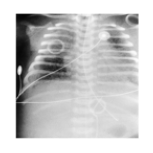

In [ ]:
import matplotlib.pyplot as plt

# Display the first few images
plt.figure(figsize=(10, 5))
for i in range(1):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
plt.show()


In [ ]:
# Normalize the images (scaling pixel values to [0, 1])
images_normalized = images / 255.0

# Check the range of pixel values after normalization
print("Pixel value range after normalization:", images_normalized.min(), "to", images_normalized.max())


Pixel value range after normalization: 0.0 to 1.0


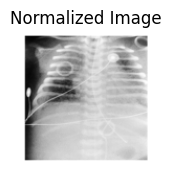

In [ ]:
import matplotlib.pyplot as plt

# Display the first few normalized images
plt.figure(figsize=(10, 5))
for i in range(1):
    plt.subplot(1, 5, i+1)
    plt.imshow(images_normalized[i], cmap='gray')
    plt.axis('off')
plt.title("Normalized Image")
plt.show()


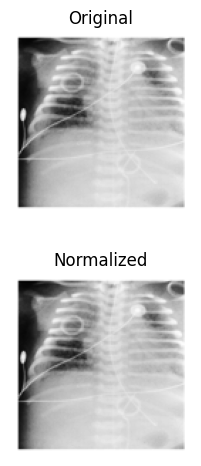

In [ ]:
import matplotlib.pyplot as plt

# Display the first few images in both original and normalized forms
plt.figure(figsize=(10, 5))
for i in range(1):
    # Original (non-normalized) image
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title("Original")

    # Normalized image
    plt.subplot(2, 5, i+6)
    plt.imshow(images_normalized[i], cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title("Normalized")

plt.tight_layout()
plt.show()


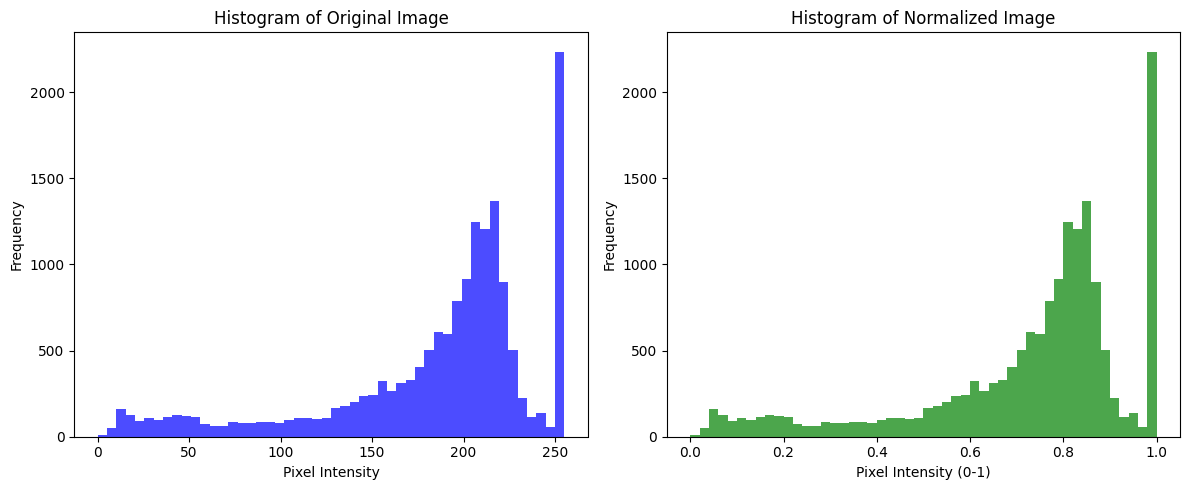

In [ ]:
import matplotlib.pyplot as plt

# Flatten the images to 1D arrays for histogram plotting
original_flat = images[0].flatten()  # First image, non-normalized
normalized_flat = images_normalized[0].flatten()  # First image, normalized

# Plot histograms for the original and normalized images
plt.figure(figsize=(12, 5))

# Original image histogram
plt.subplot(1, 2, 1)
plt.hist(original_flat, bins=50, color='blue', alpha=0.7)
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Normalized image histogram
plt.subplot(1, 2, 2)
plt.hist(normalized_flat, bins=50, color='green', alpha=0.7)
plt.title("Histogram of Normalized Image")
plt.xlabel("Pixel Intensity (0-1)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


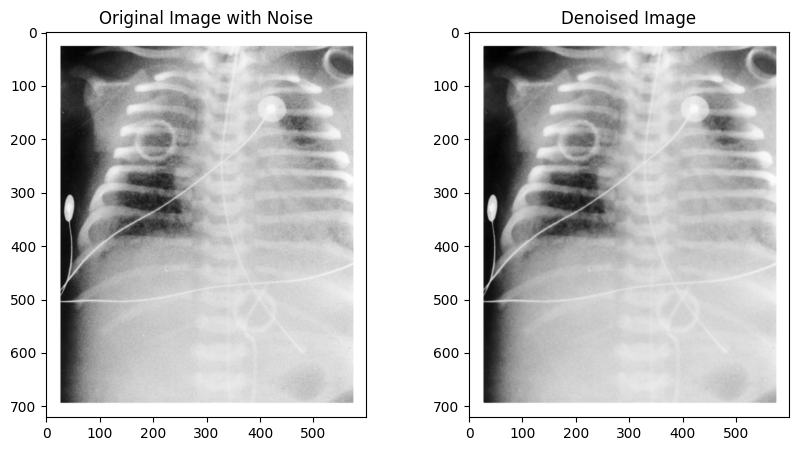

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image (assuming it's grayscale)
image = cv2.imread("/content/drive/MyDrive/images/PMC29009_cc-3-1-019-2.jpg", cv2.IMREAD_GRAYSCALE)

# Apply median filtering
denoised_image = cv2.medianBlur(image, 3)  # 3x3 kernel size

# Display the original and denoised images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image with Noise")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Denoised Image")
plt.imshow(denoised_image, cmap='gray')
plt.show()


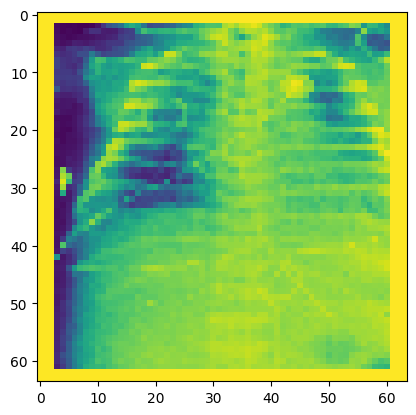

In [ ]:
import cv2
resized_image = cv2.resize(image, (64, 64))  # Resize to 128x128
plt.imshow(resized_image)
plt.axis('on')  # Turn off axis labels
plt.show()

In [ ]:
import cv2
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)
plt.axis('on')  # Turn off axis labels
plt.show()

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


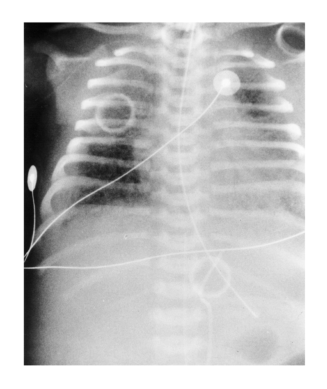

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/drive/MyDrive/images/PMC29009_cc-3-1-019-2.jpg')

# Check if the image is loaded correctly
if image is None:
    print("Error: Unable to load the image. Check the path or file format.")
else:
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Display the grayscale image
    plt.imshow(gray_image, cmap='gray')
    plt.axis('off')  # Hide axes for better visualization
    plt.show()


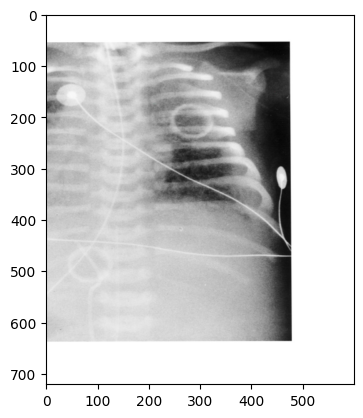

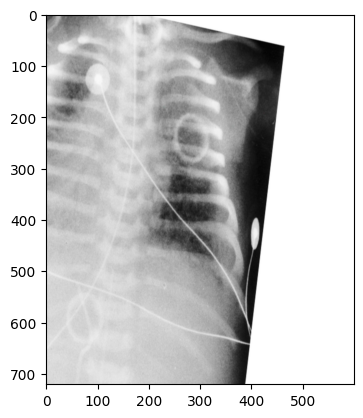

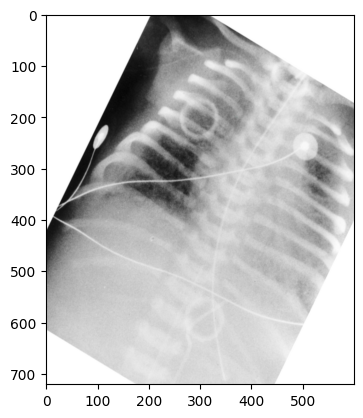

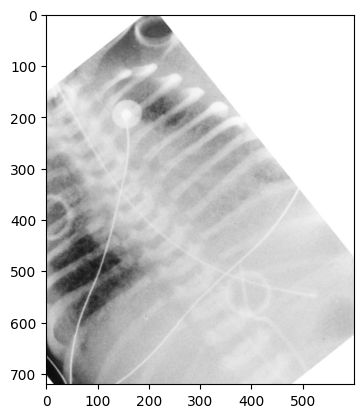

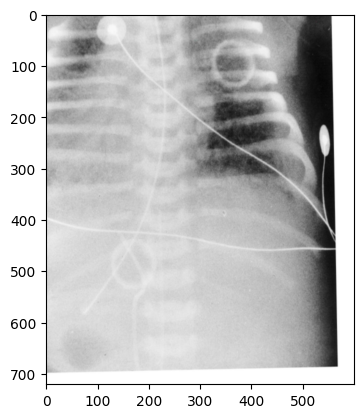

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Initialize ImageDataGenerator for real-time data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to range [0, 1]
    rotation_range=40,  # Random rotations in degrees
    width_shift_range=0.2,  # Shift images horizontally
    height_shift_range=0.2,  # Shift images vertically
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # How to fill the missing pixels after transformations
)

# Load an image to augment
img = image.load_img('/content/drive/MyDrive/images/PMC29009_cc-3-1-019-2.jpg')
x = image.img_to_array(img)  # Convert the image to a NumPy array
x = np.expand_dims(x, axis=0)  # Expand dimensions to (1, height, width, channels)

# Generate augmented images (e.g., 4 samples)
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='/content/drive/MyDrive/images/PMC29009_cc-3-1-019-2/', save_prefix='aug', save_format='jpeg'):
    plt.figure(i)
    imgplot = plt.imshow(batch[0])
    i += 1
    if i > 4:  # Stop after 4 augmented images
        break

plt.show()


Natural language processing

In [ ]:
ai="""Artificial intelligence (AI), in its broadest sense, is intelligence exhibited by machines, particularly computer systems. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.[1] Such machines may be called AIs."""

In [ ]:
print(ai)

Artificial intelligence (AI), in its broadest sense, is intelligence exhibited by machines, particularly computer systems. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.[1] Such machines may be called AIs.


In [ ]:
print(ai.upper())

ARTIFICIAL INTELLIGENCE (AI), IN ITS BROADEST SENSE, IS INTELLIGENCE EXHIBITED BY MACHINES, PARTICULARLY COMPUTER SYSTEMS. IT IS A FIELD OF RESEARCH IN COMPUTER SCIENCE THAT DEVELOPS AND STUDIES METHODS AND SOFTWARE THAT ENABLE MACHINES TO PERCEIVE THEIR ENVIRONMENT AND USE LEARNING AND INTELLIGENCE TO TAKE ACTIONS THAT MAXIMIZE THEIR CHANCES OF ACHIEVING DEFINED GOALS.[1] SUCH MACHINES MAY BE CALLED AIS.


In [ ]:
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words=set(stopwords.words('english'))
print(stop_words)

{'such', 'too', "doesn't", 've', 'i', 'mightn', "you'll", 'against', 'shouldn', 'am', 'a', 'further', 'few', 'both', 'hasn', 'through', 're', 'himself', 'or', "didn't", 'did', "she's", 'hadn', "isn't", 'are', 'more', "needn't", 'm', 'no', 'you', 'myself', 'until', 'was', 'itself', 'with', 'then', 'below', 'my', 'nor', 'been', "hadn't", 'from', "weren't", 'under', 'having', 'off', "you're", "won't", 'because', 'when', 'above', 'have', 'once', 'those', 'him', 'ours', "shouldn't", 'shan', 'during', 'and', 'before', 'an', 'between', 'yourself', "you'd", "wouldn't", 'just', 'we', 'her', 'being', "couldn't", 'themselves', 'doesn', 'your', "wasn't", 'over', 'by', 'its', 'yours', 'didn', 'do', 'mustn', 'they', 's', 'same', 'had', 'our', 'yourselves', 'o', 'what', 'whom', 'does', "that'll", 'will', 'couldn', 'hers', 'who', 'after', 'on', "shan't", 'isn', 'down', 'into', 'here', "haven't", 'he', 'how', "it's", 'in', 'other', 'these', 'doing', 'it', 'the', 'wasn', 'don', 'as', "don't", "should've

In [ ]:
text_input=" ".join([word for word in corpus.split() if word not in stop_words])
print(text_input)

Artificial intelligence (AI), broadest sense, intelligence exhibited machines, particularly computer systems. It field research computer science develops studies methods software enable machines perceive environment use learning intelligence take actions maximize chances achieving defined goals.[1] Such machines may called AIs.


In [ ]:
from nltk.tokenize import wordpunct_tokenize
wordpunct_tokenize(corpus)

['Artificial',
 'intelligence',
 '(',
 'AI',
 '),',
 'in',
 'its',
 'broadest',
 'sense',
 ',',
 'is',
 'intelligence',
 'exhibited',
 'by',
 'machines',
 ',',
 'particularly',
 'computer',
 'systems',
 '.',
 'It',
 'is',
 'a',
 'field',
 'of',
 'research',
 'in',
 'computer',
 'science',
 'that',
 'develops',
 'and',
 'studies',
 'methods',
 'and',
 'software',
 'that',
 'enable',
 'machines',
 'to',
 'perceive',
 'their',
 'environment',
 'and',
 'use',
 'learning',
 'and',
 'intelligence',
 'to',
 'take',
 'actions',
 'that',
 'maximize',
 'their',
 'chances',
 'of',
 'achieving',
 'defined',
 'goals',
 '.[',
 '1',
 ']',
 'Such',
 'machines',
 'may',
 'be',
 'called',
 'AIs',
 '.']

Stemming

In [ ]:
words=["eating","eats","eaten","writing","writes","programming"]
from nltk.stem import PorterStemmer
stemming=PorterStemmer()
for word in words:
  print(word+"---"+stemming.stem(word))

eating---eat
eats---eat
eaten---eaten
writing---write
writes---write
programming---program


pos


In [ ]:
!pip install nltk spacy scikit-learn
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 59.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [19]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Sample text
text = "Artificial intelligence (AI), in its broadest sense, is intelligence exhibited by machines, particularly computer systems."

# Process the text
doc = nlp(text)

# POS Tagging
pos_tags = [(token.text, token.pos_) for token in doc]
print("POS Tags:", pos_tags)

# Named Entity Recognition (NER)
ner_tags = [(ent.text, ent.label_) for ent in doc.ents]
print("Named Entities:", ner_tags)


POS Tags: [('Artificial', 'ADJ'), ('intelligence', 'NOUN'), ('(', 'PUNCT'), ('AI', 'PROPN'), (')', 'PUNCT'), (',', 'PUNCT'), ('in', 'ADP'), ('its', 'PRON'), ('broadest', 'ADJ'), ('sense', 'NOUN'), (',', 'PUNCT'), ('is', 'AUX'), ('intelligence', 'NOUN'), ('exhibited', 'VERB'), ('by', 'ADP'), ('machines', 'NOUN'), (',', 'PUNCT'), ('particularly', 'ADV'), ('computer', 'NOUN'), ('systems', 'NOUN'), ('.', 'PUNCT')]
Named Entities: [('AI', 'ORG')]


In [21]:
import spacy

# Load the spaCy model for NER
nlp = spacy.load("en_core_web_sm")

# Sample text
text = "Artificial intelligence (AI), in its broadest sense, is intelligence exhibited by machines, particularly computer systems."

# Apply NER
doc = nlp(text)
for ent in doc.ents:
    print(f"Entity: {ent.text}, Label: {ent.label_}")


Entity: AI, Label: ORG


In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample corpus
corpus = [
    "Natural language processing with Python.",
    "Python is great for data science.",
    "Data science and machine learning are related fields."
]

# Create a BoG model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

# Display the vocabulary and the document-term matrix
print("Vocabulary:", vectorizer.vocabulary_)
print("Document-Term Matrix:\n", X.toarray())


Vocabulary: {'natural': 10, 'language': 7, 'processing': 11, 'with': 15, 'python': 12, 'is': 6, 'great': 5, 'for': 4, 'data': 2, 'science': 14, 'and': 0, 'machine': 9, 'learning': 8, 'are': 1, 'related': 13, 'fields': 3}
Document-Term Matrix:
 [[0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1]
 [0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0]
 [1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0]]
